###**Project B3: STOCK MARKET. Using neural networks for stock market prediction**

In our project we will focus on the stock market predictions - the highly volatile and complex time series. Traditionally machine learning approaches like SVM and Regressions are used to predict possible price movements. However in recent research it is shown that neural networks are much better at handling non-linear models. In this project we will see for ourselves, if it is true. 

# Imports

These are the imports that are used in the whole project for plotting and working with Dataframes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Data

Google Colab way of uploading files to work with.

In [2]:
kagglefiles = files.upload()

Saving amzn.us.txt to amzn.us (1).txt
Saving aple.us.txt to aple.us (1).txt
Saving googl.us.txt to googl.us (1).txt
Saving msft.us.txt to msft.us (1).txt
Saving samg.us.txt to samg.us (1).txt


# Data preparation

Reading data into respective dataframes.

In [3]:
def create_dataframe(filename):
  df = pd.read_csv(filename)
  return df

df_amazon = create_dataframe("amzn.us.txt")
df_google = create_dataframe("googl.us.txt")
df_apple = create_dataframe("aple.us.txt")
df_microsoft = create_dataframe("msft.us.txt")
df_samsung = create_dataframe("samg.us.txt")

Checking the data in the dataframe, whether it contains NaN values. As the original files should not contain any NaN files, this is to check whether the data we have used is not mutated.

In [4]:
def prepare_data(dataframe):
  print("Preparing Data : ")
  nrofNaNs = dataframe.isnull().sum().sum()
  if(nrofNaNs == 0):
    print("No NaN values found, returning original dataframe.")
    return dataframe
  else:
    print("Found NaN values")

In [5]:
df_new_amazon = prepare_data(df_amazon)
df_new_google = prepare_data(df_google)
df_new_apple = prepare_data(df_apple)
df_new_microsoft = prepare_data(df_microsoft)
df_new_samsung = prepare_data(df_samsung)

dataframe_list = [df_new_amazon,df_new_google,df_new_apple,df_new_microsoft,df_new_samsung]

Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.


# Support vector machine (SVM)

Support vector machines (SVMs) are supervised learning models with associated learning algortihms that analyze data used for classification and regression analysis. This method is one of the most robust prediction methods, based on the statistical learning framework proposed by Vapnik and Chervonenkis. 

Imports needed for the support vector machine.

In [6]:
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report

Function for creating copies of dataframes, so that given dataframes are not changed.

In [7]:
def create_df_copy(df):
  return df.copy(deep=True)

Creates a plot depending on the values of Date and Close.

In [8]:
def create_plt(dataframe, name):
  company_dates = [pd.Timestamp(date) for date in dataframe['Date']]
  company_close = np.array(dataframe['Close'],dtype='float')
  
  plt.title(name)
  plt.scatter(company_dates,company_close)
  plt.show()

Function used to get the X and Y depending on the dataframes Close value.

In [9]:
def get_X_and_Y(df,window_length=7,predict_day_length=1):
    m = len(df.iloc[0])
    n = len(df) - window_length
    m = window_length * m

    X = np.ones((n,m))
    Y = np.ones((n,1))

    for i in range(len(df)-window_length):
        ans = [list(df.iloc[j] for j in range(i, i+window_length))]
        ans = np.array(ans).flatten()
        X[i] = ans
        Y[i] = 1 if df.Close[i+window_length+predict_day_length-1] - df.Close[i+window_length-1] > 0 else 0
      
    return [X,Y]

Method that trains the model and calculates the accuracy of the model.

In [10]:
def getTrainTestSplit(X, Y, breakoff):
  train_size = int(len(X) * breakoff)
  dataArray = df.to_numpy()
  X_train = X[:train_size]
  y_train = Y[:train_size]
  X_test = X[train_size:]
  y_test = Y[train_size:]
  return (X_train, X_test, y_train, y_test)

In [11]:
def train_and_test(df,window_length,accurarys,reports):
    X, Y = get_X_and_Y(df, window_length=window_length)
    Y = Y.flatten()
    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = getTrainTestSplit(X, Y, 0.75)

    for kernel_arg in ['rbf', 'poly', 'linear']:
        clf = svm.SVC(kernel=kernel_arg, max_iter=5000)
        clf.fit(X_train, Y_train)
        y_predict = clf.predict(X_test)

        accurary = clf.score(X_test, Y_test)
        report = classification_report(Y_test, y_predict, target_names = ['Drop','Up'])

        if window_length in accurarys:
            accurarys[window_length].append(accurary)
            reports[window_length].append(report)
        else: 
            accurarys[window_length] = [accurary]
            reports[window_length] = [report]
            
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(X_test, Y_test)))
        print(report)

This is the function, that plays as main for our SVM model.

In [12]:
def run_SVM(df, name):
  new_df = create_df_copy(df)

  create_plt(new_df, name)

  new_df = new_df.set_index('Date')
  window_lengths = [7,14,21,30,60,90,120,150,180]
  accurarys = {}
  reports ={}

  for length in window_lengths:
      print('window_length:',length)
      train_and_test(new_df, length, accurarys, reports)

Running the SVM model for all of our datasets

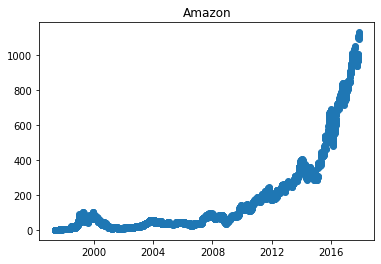

window_length: 7


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.467754
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       602
          Up       0.00      0.00      0.00       685

    accuracy                           0.47      1287
   macro avg       0.23      0.50      0.32      1287
weighted avg       0.22      0.47      0.30      1287



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532246
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       602
          Up       0.53      1.00      0.69       685

    accuracy                           0.53      1287
   macro avg       0.27      0.50      0.35      1287
weighted avg       0.28      0.53      0.37      1287



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.490287
              precision    recall  f1-score   support

        Drop       0.42      0.23      0.30       602
          Up       0.52      0.72      0.60       685

    accuracy                           0.49      1287
   macro avg       0.47      0.47      0.45      1287
weighted avg       0.47      0.49      0.46      1287

window_length: 14
The Accurary of rbf : 0.467704
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       601
          Up       0.50      0.00      0.01       684

    accuracy                           0.47      1285
   macro avg       0.48      0.50      0.32      1285
weighted avg       0.48      0.47      0.30      1285



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532296
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       601
          Up       0.53      1.00      0.69       684

    accuracy                           0.53      1285
   macro avg       0.27      0.50      0.35      1285
weighted avg       0.28      0.53      0.37      1285



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.531518
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       601
          Up       0.53      1.00      0.69       684

    accuracy                           0.53      1285
   macro avg       0.27      0.50      0.35      1285
weighted avg       0.28      0.53      0.37      1285

window_length: 21
The Accurary of rbf : 0.466095
              precision    recall  f1-score   support

        Drop       0.47      0.99      0.63       600
          Up       0.43      0.01      0.02       683

    accuracy                           0.47      1283
   macro avg       0.45      0.50      0.33      1283
weighted avg       0.45      0.47      0.31      1283



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.467654
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       600
          Up       0.00      0.00      0.00       683

    accuracy                           0.47      1283
   macro avg       0.23      0.50      0.32      1283
weighted avg       0.22      0.47      0.30      1283



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.534684
              precision    recall  f1-score   support

        Drop       0.67      0.01      0.02       600
          Up       0.53      1.00      0.69       683

    accuracy                           0.53      1283
   macro avg       0.60      0.50      0.36      1283
weighted avg       0.60      0.53      0.38      1283

window_length: 30
The Accurary of rbf : 0.469165
              precision    recall  f1-score   support

        Drop       0.47      0.99      0.64       599
          Up       0.60      0.01      0.02       682

    accuracy                           0.47      1281
   macro avg       0.53      0.50      0.33      1281
weighted avg       0.54      0.47      0.31      1281



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.467603
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       599
          Up       0.00      0.00      0.00       682

    accuracy                           0.47      1281
   macro avg       0.23      0.50      0.32      1281
weighted avg       0.22      0.47      0.30      1281



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.532397
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       599
          Up       0.53      1.00      0.69       682

    accuracy                           0.53      1281
   macro avg       0.27      0.50      0.35      1281
weighted avg       0.28      0.53      0.37      1281

window_length: 60
The Accurary of rbf : 0.466248
              precision    recall  f1-score   support

        Drop       0.47      0.99      0.63       594
          Up       0.50      0.01      0.02       680

    accuracy                           0.47      1274
   macro avg       0.48      0.50      0.33      1274
weighted avg       0.48      0.47      0.30      1274



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.466248
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       594
          Up       0.00      0.00      0.00       680

    accuracy                           0.47      1274
   macro avg       0.23      0.50      0.32      1274
weighted avg       0.22      0.47      0.30      1274



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.533752
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       594
          Up       0.53      1.00      0.70       680

    accuracy                           0.53      1274
   macro avg       0.27      0.50      0.35      1274
weighted avg       0.28      0.53      0.37      1274

window_length: 90
The Accurary of rbf : 0.460506
              precision    recall  f1-score   support

        Drop       0.46      0.99      0.63       588
          Up       0.27      0.00      0.01       678

    accuracy                           0.46      1266
   macro avg       0.37      0.50      0.32      1266
weighted avg       0.36      0.46      0.30      1266



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.464455
              precision    recall  f1-score   support

        Drop       0.46      1.00      0.63       588
          Up       0.00      0.00      0.00       678

    accuracy                           0.46      1266
   macro avg       0.23      0.50      0.32      1266
weighted avg       0.22      0.46      0.29      1266



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.535545
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       588
          Up       0.54      1.00      0.70       678

    accuracy                           0.54      1266
   macro avg       0.27      0.50      0.35      1266
weighted avg       0.29      0.54      0.37      1266

window_length: 120
The Accurary of rbf : 0.466243
              precision    recall  f1-score   support

        Drop       0.46      0.98      0.63       585
          Up       0.55      0.02      0.03       674

    accuracy                           0.47      1259
   macro avg       0.51      0.50      0.33      1259
weighted avg       0.51      0.47      0.31      1259



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.464654
              precision    recall  f1-score   support

        Drop       0.46      1.00      0.63       585
          Up       0.00      0.00      0.00       674

    accuracy                           0.46      1259
   macro avg       0.23      0.50      0.32      1259
weighted avg       0.22      0.46      0.29      1259



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.535346
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       585
          Up       0.54      1.00      0.70       674

    accuracy                           0.54      1259
   macro avg       0.27      0.50      0.35      1259
weighted avg       0.29      0.54      0.37      1259

window_length: 150
The Accurary of rbf : 0.468425
              precision    recall  f1-score   support

        Drop       0.47      0.94      0.62       583
          Up       0.52      0.06      0.10       668

    accuracy                           0.47      1251
   macro avg       0.49      0.50      0.36      1251
weighted avg       0.49      0.47      0.35      1251



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.466027
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       583
          Up       0.00      0.00      0.00       668

    accuracy                           0.47      1251
   macro avg       0.23      0.50      0.32      1251
weighted avg       0.22      0.47      0.30      1251



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.533973
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       583
          Up       0.53      1.00      0.70       668

    accuracy                           0.53      1251
   macro avg       0.27      0.50      0.35      1251
weighted avg       0.29      0.53      0.37      1251

window_length: 180
The Accurary of rbf : 0.506431
              precision    recall  f1-score   support

        Drop       0.47      0.40      0.43       581
          Up       0.53      0.60      0.56       663

    accuracy                           0.51      1244
   macro avg       0.50      0.50      0.50      1244
weighted avg       0.50      0.51      0.50      1244



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.467042
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       581
          Up       0.00      0.00      0.00       663

    accuracy                           0.47      1244
   macro avg       0.23      0.50      0.32      1244
weighted avg       0.22      0.47      0.30      1244



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.532958
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       581
          Up       0.53      1.00      0.70       663

    accuracy                           0.53      1244
   macro avg       0.27      0.50      0.35      1244
weighted avg       0.28      0.53      0.37      1244



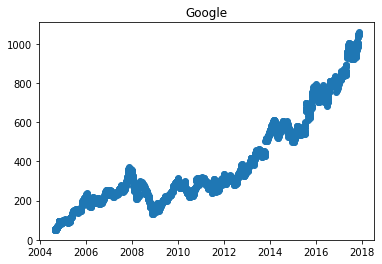

window_length: 7


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.532452
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       389
          Up       0.53      1.00      0.69       443

    accuracy                           0.53       832
   macro avg       0.27      0.50      0.35       832
weighted avg       0.28      0.53      0.37       832



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532452
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       389
          Up       0.53      1.00      0.69       443

    accuracy                           0.53       832
   macro avg       0.27      0.50      0.35       832
weighted avg       0.28      0.53      0.37       832

The Accurary of linear : 0.532452
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       389
          Up       0.53      1.00      0.69       443

    accuracy                           0.53       832
   macro avg       0.27      0.50      0.35       832
weighted avg       0.28      0.53      0.37       832

window_length: 14


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.532530
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       388
          Up       0.53      1.00      0.69       442

    accuracy                           0.53       830
   macro avg       0.27      0.50      0.35       830
weighted avg       0.28      0.53      0.37       830



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532530
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       388
          Up       0.53      1.00      0.69       442

    accuracy                           0.53       830
   macro avg       0.27      0.50      0.35       830
weighted avg       0.28      0.53      0.37       830



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.532530
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       388
          Up       0.53      1.00      0.69       442

    accuracy                           0.53       830
   macro avg       0.27      0.50      0.35       830
weighted avg       0.28      0.53      0.37       830

window_length: 21


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.532609
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       387
          Up       0.53      1.00      0.70       441

    accuracy                           0.53       828
   macro avg       0.27      0.50      0.35       828
weighted avg       0.28      0.53      0.37       828



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532609
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       387
          Up       0.53      1.00      0.70       441

    accuracy                           0.53       828
   macro avg       0.27      0.50      0.35       828
weighted avg       0.28      0.53      0.37       828



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.532609
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       387
          Up       0.53      1.00      0.70       441

    accuracy                           0.53       828
   macro avg       0.27      0.50      0.35       828
weighted avg       0.28      0.53      0.37       828

window_length: 30


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.532688
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       386
          Up       0.53      1.00      0.70       440

    accuracy                           0.53       826
   macro avg       0.27      0.50      0.35       826
weighted avg       0.28      0.53      0.37       826



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.532688
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       386
          Up       0.53      1.00      0.70       440

    accuracy                           0.53       826
   macro avg       0.27      0.50      0.35       826
weighted avg       0.28      0.53      0.37       826



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.532688
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       386
          Up       0.53      1.00      0.70       440

    accuracy                           0.53       826
   macro avg       0.27      0.50      0.35       826
weighted avg       0.28      0.53      0.37       826

window_length: 60


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.533578
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       382
          Up       0.53      1.00      0.70       437

    accuracy                           0.53       819
   macro avg       0.27      0.50      0.35       819
weighted avg       0.28      0.53      0.37       819



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.533578
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       382
          Up       0.53      1.00      0.70       437

    accuracy                           0.53       819
   macro avg       0.27      0.50      0.35       819
weighted avg       0.28      0.53      0.37       819



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.533578
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       382
          Up       0.53      1.00      0.70       437

    accuracy                           0.53       819
   macro avg       0.27      0.50      0.35       819
weighted avg       0.28      0.53      0.37       819

window_length: 90


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.533909
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       378
          Up       0.53      1.00      0.70       433

    accuracy                           0.53       811
   macro avg       0.27      0.50      0.35       811
weighted avg       0.29      0.53      0.37       811



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.533909
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       378
          Up       0.53      1.00      0.70       433

    accuracy                           0.53       811
   macro avg       0.27      0.50      0.35       811
weighted avg       0.29      0.53      0.37       811



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.533909
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       378
          Up       0.53      1.00      0.70       433

    accuracy                           0.53       811
   macro avg       0.27      0.50      0.35       811
weighted avg       0.29      0.53      0.37       811

window_length: 120


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.533582
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       375
          Up       0.53      1.00      0.70       429

    accuracy                           0.53       804
   macro avg       0.27      0.50      0.35       804
weighted avg       0.28      0.53      0.37       804



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.533582
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       375
          Up       0.53      1.00      0.70       429

    accuracy                           0.53       804
   macro avg       0.27      0.50      0.35       804
weighted avg       0.28      0.53      0.37       804



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.533582
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       375
          Up       0.53      1.00      0.70       429

    accuracy                           0.53       804
   macro avg       0.27      0.50      0.35       804
weighted avg       0.28      0.53      0.37       804

window_length: 150


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.533920
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       371
          Up       0.53      1.00      0.70       425

    accuracy                           0.53       796
   macro avg       0.27      0.50      0.35       796
weighted avg       0.29      0.53      0.37       796



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.533920
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       371
          Up       0.53      1.00      0.70       425

    accuracy                           0.53       796
   macro avg       0.27      0.50      0.35       796
weighted avg       0.29      0.53      0.37       796



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.466080
              precision    recall  f1-score   support

        Drop       0.47      1.00      0.64       371
          Up       0.00      0.00      0.00       425

    accuracy                           0.47       796
   macro avg       0.23      0.50      0.32       796
weighted avg       0.22      0.47      0.30       796

window_length: 180


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.533587
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       368
          Up       0.53      1.00      0.70       421

    accuracy                           0.53       789
   macro avg       0.27      0.50      0.35       789
weighted avg       0.28      0.53      0.37       789



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.533587
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       368
          Up       0.53      1.00      0.70       421

    accuracy                           0.53       789
   macro avg       0.27      0.50      0.35       789
weighted avg       0.28      0.53      0.37       789



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.471483
              precision    recall  f1-score   support

        Drop       0.47      0.91      0.62       368
          Up       0.53      0.09      0.15       421

    accuracy                           0.47       789
   macro avg       0.50      0.50      0.38       789
weighted avg       0.50      0.47      0.37       789



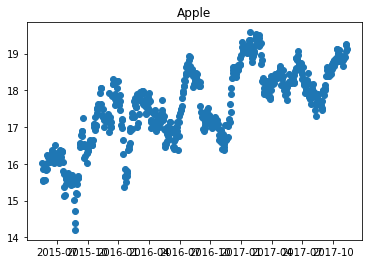

window_length: 7
The Accurary of rbf : 0.519231
              precision    recall  f1-score   support

        Drop       0.50      0.01      0.03        75
          Up       0.52      0.99      0.68        81

    accuracy                           0.52       156
   macro avg       0.51      0.50      0.35       156
weighted avg       0.51      0.52      0.37       156

The Accurary of poly : 0.519231
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        75
          Up       0.52      1.00      0.68        81

    accuracy                           0.52       156
   macro avg       0.26      0.50      0.34       156
weighted avg       0.27      0.52      0.35       156

The Accurary of linear : 0.467949
              precision    recall  f1-score   support

        Drop       0.28      0.07      0.11        75
          Up       0.49      0.84      0.62        81

    accuracy                           0.47       156
   macro avg  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

The Accurary of rbf : 0.525974
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        73
          Up       0.53      1.00      0.69        81

    accuracy                           0.53       154
   macro avg       0.26      0.50      0.34       154
weighted avg       0.28      0.53      0.36       154

The Accurary of poly : 0.525974
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        73
          Up       0.53      1.00      0.69        81

    accuracy                           0.53       154
   macro avg       0.26      0.50      0.34       154
weighted avg       0.28      0.53      0.36       154

The Accurary of linear : 0.487013
              precision    recall  f1-score   support

        Drop       0.36      0.11      0.17        73
          Up       0.51      0.83      0.63        81

    accuracy                           0.49       154
   macro avg       0.44      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.513333
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        71
          Up       0.52      0.97      0.68        79

    accuracy                           0.51       150
   macro avg       0.26      0.49      0.34       150
weighted avg       0.27      0.51      0.36       150

The Accurary of poly : 0.526667
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        71
          Up       0.53      1.00      0.69        79

    accuracy                           0.53       150
   macro avg       0.26      0.50      0.34       150
weighted avg       0.28      0.53      0.36       150

The Accurary of linear : 0.540000
              precision    recall  f1-score   support

        Drop       0.62      0.07      0.13        71
          Up       0.54      0.96      0.69        79

    accuracy                           0.54       150
   macro avg       0.58      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of rbf : 0.507042
              precision    recall  f1-score   support

        Drop       0.20      0.01      0.03        67
          Up       0.52      0.95      0.67        75

    accuracy                           0.51       142
   macro avg       0.36      0.48      0.35       142
weighted avg       0.37      0.51      0.37       142

The Accurary of poly : 0.528169
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        67
          Up       0.53      1.00      0.69        75

    accuracy                           0.53       142
   macro avg       0.26      0.50      0.35       142
weighted avg       0.28      0.53      0.37       142



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.528169
              precision    recall  f1-score   support

        Drop       0.50      0.06      0.11        67
          Up       0.53      0.95      0.68        75

    accuracy                           0.53       142
   macro avg       0.51      0.50      0.39       142
weighted avg       0.52      0.53      0.41       142

window_length: 90
The Accurary of rbf : 0.511111
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        65
          Up       0.51      0.99      0.68        70

    accuracy                           0.51       135
   macro avg       0.26      0.49      0.34       135
weighted avg       0.27      0.51      0.35       135



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of poly : 0.518519
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        65
          Up       0.52      1.00      0.68        70

    accuracy                           0.52       135
   macro avg       0.26      0.50      0.34       135
weighted avg       0.27      0.52      0.35       135

The Accurary of linear : 0.533333
              precision    recall  f1-score   support

        Drop       0.58      0.11      0.18        65
          Up       0.53      0.93      0.67        70

    accuracy                           0.53       135
   macro avg       0.56      0.52      0.43       135
weighted avg       0.55      0.53      0.44       135

window_length: 120
The Accurary of rbf : 0.496063
              precision    recall  f1-score   support

        Drop       0.25      0.03      0.06        60
          Up       0.51      0.91      0.66        67

    accuracy                           0.50       127
   macro avg

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of poly : 0.527559
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00        60
          Up       0.53      1.00      0.69        67

    accuracy                           0.53       127
   macro avg       0.26      0.50      0.35       127
weighted avg       0.28      0.53      0.36       127

The Accurary of linear : 0.511811
              precision    recall  f1-score   support

        Drop       0.47      0.25      0.33        60
          Up       0.53      0.75      0.62        67

    accuracy                           0.51       127
   macro avg       0.50      0.50      0.47       127
weighted avg       0.50      0.51      0.48       127

window_length: 150
The Accurary of rbf : 0.491667
              precision    recall  f1-score   support

        Drop       0.36      0.09      0.14        57
          Up       0.51      0.86      0.64        63

    accuracy                           0.49       120
   macro avg

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.525000
              precision    recall  f1-score   support

        Drop       0.50      0.42      0.46        57
          Up       0.54      0.62      0.58        63

    accuracy                           0.53       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.52      0.53      0.52       120

window_length: 180
The Accurary of rbf : 0.517857
              precision    recall  f1-score   support

        Drop       0.47      0.15      0.23        53
          Up       0.53      0.85      0.65        59

    accuracy                           0.52       112
   macro avg       0.50      0.50      0.44       112
weighted avg       0.50      0.52      0.45       112

The Accurary of poly : 0.482143
              precision    recall  f1-score   support

        Drop       0.22      0.04      0.06        53
          Up       0.50      0.88      0.64        59

    accuracy                           0.48       112
   macro avg

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.428571
              precision    recall  f1-score   support

        Drop       0.37      0.30      0.33        53
          Up       0.46      0.54      0.50        59

    accuracy                           0.43       112
   macro avg       0.42      0.42      0.42       112
weighted avg       0.42      0.43      0.42       112



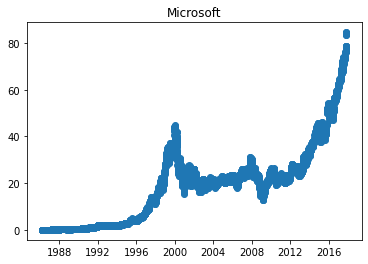

window_length: 7


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of rbf : 0.490471
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       979
          Up       0.00      0.00      0.00      1015

    accuracy                           0.49      1994
   macro avg       0.25      0.50      0.33      1994
weighted avg       0.24      0.49      0.32      1994



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.509027
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       979
          Up       0.51      1.00      0.67      1015

    accuracy                           0.51      1994
   macro avg       0.25      0.50      0.34      1994
weighted avg       0.26      0.51      0.34      1994



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.508024
              precision    recall  f1-score   support

        Drop       0.45      0.01      0.02       979
          Up       0.51      0.99      0.67      1015

    accuracy                           0.51      1994
   macro avg       0.48      0.50      0.35      1994
weighted avg       0.48      0.51      0.35      1994

window_length: 14


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.490718
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       978
          Up       0.00      0.00      0.00      1015

    accuracy                           0.49      1993
   macro avg       0.25      0.50      0.33      1993
weighted avg       0.24      0.49      0.32      1993



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of poly : 0.489714
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       978
          Up       0.00      0.00      0.00      1015

    accuracy                           0.49      1993
   macro avg       0.25      0.50      0.33      1993
weighted avg       0.24      0.49      0.32      1993



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.509784
              precision    recall  f1-score   support

        Drop       0.51      0.03      0.07       978
          Up       0.51      0.97      0.67      1015

    accuracy                           0.51      1993
   macro avg       0.51      0.50      0.37      1993
weighted avg       0.51      0.51      0.37      1993

window_length: 21


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.490708
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       977
          Up       0.00      0.00      0.00      1014

    accuracy                           0.49      1991
   macro avg       0.25      0.50      0.33      1991
weighted avg       0.24      0.49      0.32      1991



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of poly : 0.490708
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       977
          Up       0.50      0.00      0.00      1014

    accuracy                           0.49      1991
   macro avg       0.50      0.50      0.33      1991
weighted avg       0.50      0.49      0.32      1991



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.509292
              precision    recall  f1-score   support

        Drop       0.50      0.00      0.00       977
          Up       0.51      1.00      0.67      1014

    accuracy                           0.51      1991
   macro avg       0.50      0.50      0.34      1991
weighted avg       0.50      0.51      0.34      1991

window_length: 30


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.490699
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       976
          Up       0.00      0.00      0.00      1013

    accuracy                           0.49      1989
   macro avg       0.25      0.50      0.33      1989
weighted avg       0.24      0.49      0.32      1989



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.490699
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       976
          Up       0.00      0.00      0.00      1013

    accuracy                           0.49      1989
   macro avg       0.25      0.50      0.33      1989
weighted avg       0.24      0.49      0.32      1989



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.508296
              precision    recall  f1-score   support

        Drop       0.44      0.01      0.01       976
          Up       0.51      0.99      0.67      1013

    accuracy                           0.51      1989
   macro avg       0.47      0.50      0.34      1989
weighted avg       0.47      0.51      0.35      1989

window_length: 60
The Accurary of rbf : 0.491166
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       975
          Up       0.25      0.00      0.00      1006

    accuracy                           0.49      1981
   macro avg       0.37      0.50      0.33      1981
weighted avg       0.37      0.49      0.33      1981



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.492176
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       975
          Up       0.00      0.00      0.00      1006

    accuracy                           0.49      1981
   macro avg       0.25      0.50      0.33      1981
weighted avg       0.24      0.49      0.32      1981



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.507824
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       975
          Up       0.51      1.00      0.67      1006

    accuracy                           0.51      1981
   macro avg       0.25      0.50      0.34      1981
weighted avg       0.26      0.51      0.34      1981

window_length: 90
The Accurary of rbf : 0.491895
              precision    recall  f1-score   support

        Drop       0.49      0.99      0.66       971
          Up       0.50      0.01      0.02      1003

    accuracy                           0.49      1974
   macro avg       0.50      0.50      0.34      1974
weighted avg       0.50      0.49      0.33      1974



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.491895
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       971
          Up       0.00      0.00      0.00      1003

    accuracy                           0.49      1974
   macro avg       0.25      0.50      0.33      1974
weighted avg       0.24      0.49      0.32      1974



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.497974
              precision    recall  f1-score   support

        Drop       0.49      0.60      0.54       971
          Up       0.51      0.40      0.45      1003

    accuracy                           0.50      1974
   macro avg       0.50      0.50      0.49      1974
weighted avg       0.50      0.50      0.49      1974

window_length: 120
The Accurary of rbf : 0.496439
              precision    recall  f1-score   support

        Drop       0.49      0.98      0.66       966
          Up       0.60      0.03      0.06      1000

    accuracy                           0.50      1966
   macro avg       0.55      0.50      0.36      1966
weighted avg       0.55      0.50      0.35      1966



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.491353
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       966
          Up       0.00      0.00      0.00      1000

    accuracy                           0.49      1966
   macro avg       0.25      0.50      0.33      1966
weighted avg       0.24      0.49      0.32      1966



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.508647
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       966
          Up       0.51      1.00      0.67      1000

    accuracy                           0.51      1966
   macro avg       0.25      0.50      0.34      1966
weighted avg       0.26      0.51      0.34      1966

window_length: 150
The Accurary of rbf : 0.504849
              precision    recall  f1-score   support

        Drop       0.50      0.96      0.66       964
          Up       0.63      0.06      0.11       995

    accuracy                           0.50      1959
   macro avg       0.56      0.51      0.38      1959
weighted avg       0.56      0.50      0.38      1959



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.492088
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       964
          Up       0.00      0.00      0.00       995

    accuracy                           0.49      1959
   macro avg       0.25      0.50      0.33      1959
weighted avg       0.24      0.49      0.32      1959



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.507912
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       964
          Up       0.51      1.00      0.67       995

    accuracy                           0.51      1959
   macro avg       0.25      0.50      0.34      1959
weighted avg       0.26      0.51      0.34      1959

window_length: 180
The Accurary of rbf : 0.498719
              precision    recall  f1-score   support

        Drop       0.50      0.94      0.65       960
          Up       0.55      0.07      0.12       991

    accuracy                           0.50      1951
   macro avg       0.52      0.51      0.38      1951
weighted avg       0.53      0.50      0.38      1951



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.492055
              precision    recall  f1-score   support

        Drop       0.49      1.00      0.66       960
          Up       0.00      0.00      0.00       991

    accuracy                           0.49      1951
   macro avg       0.25      0.50      0.33      1951
weighted avg       0.24      0.49      0.32      1951



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.508457
              precision    recall  f1-score   support

        Drop       0.52      0.02      0.03       960
          Up       0.51      0.99      0.67       991

    accuracy                           0.51      1951
   macro avg       0.51      0.50      0.35      1951
weighted avg       0.51      0.51      0.36      1951



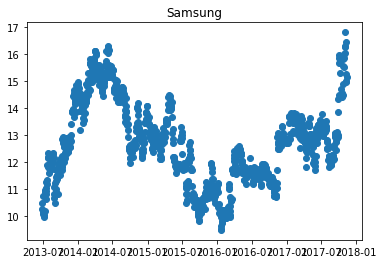

window_length: 7
The Accurary of rbf : 0.560000
              precision    recall  f1-score   support

        Drop       0.56      0.98      0.72       155
          Up       0.40      0.02      0.03       120

    accuracy                           0.56       275
   macro avg       0.48      0.50      0.37       275
weighted avg       0.49      0.56      0.42       275

The Accurary of poly : 0.563636
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       155
          Up       0.00      0.00      0.00       120

    accuracy                           0.56       275
   macro avg       0.28      0.50      0.36       275
weighted avg       0.32      0.56      0.41       275

The Accurary of linear : 0.436364
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       155
          Up       0.44      1.00      0.61       120

    accuracy                           0.44       275
   macro avg  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

The Accurary of rbf : 0.564103
              precision    recall  f1-score   support

        Drop       0.57      0.99      0.72       155
          Up       0.33      0.01      0.02       118

    accuracy                           0.56       273
   macro avg       0.45      0.50      0.37       273
weighted avg       0.47      0.56      0.42       273

The Accurary of poly : 0.567766
              precision    recall  f1-score   support

        Drop       0.57      1.00      0.72       155
          Up       0.00      0.00      0.00       118

    accuracy                           0.57       273
   macro avg       0.28      0.50      0.36       273
weighted avg       0.32      0.57      0.41       273

The Accurary of linear : 0.549451
              precision    recall  f1-score   support

        Drop       0.57      0.88      0.69       155
          Up       0.42      0.11      0.17       118

    accuracy                           0.55       273
   macro avg       0.49      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of rbf : 0.564576
              precision    recall  f1-score   support

        Drop       0.57      0.99      0.72       153
          Up       0.50      0.02      0.03       118

    accuracy                           0.56       271
   macro avg       0.53      0.50      0.38       271
weighted avg       0.54      0.56      0.42       271



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.564576
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       153
          Up       0.00      0.00      0.00       118

    accuracy                           0.56       271
   macro avg       0.28      0.50      0.36       271
weighted avg       0.32      0.56      0.41       271

The Accurary of linear : 0.435424
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       153
          Up       0.44      1.00      0.61       118

    accuracy                           0.44       271
   macro avg       0.22      0.50      0.30       271
weighted avg       0.19      0.44      0.26       271

window_length: 30
The Accurary of rbf : 0.565056
              precision    recall  f1-score   support

        Drop       0.56      0.99      0.72       151
          Up       0.67      0.02      0.03       118

    accuracy                           0.57       269
   macro avg 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.561338
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       151
          Up       0.00      0.00      0.00       118

    accuracy                           0.56       269
   macro avg       0.28      0.50      0.36       269
weighted avg       0.32      0.56      0.40       269

The Accurary of linear : 0.438662
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       151
          Up       0.44      1.00      0.61       118

    accuracy                           0.44       269
   macro avg       0.22      0.50      0.30       269
weighted avg       0.19      0.44      0.27       269

window_length: 60


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.555556
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.71       145
          Up       0.00      0.00      0.00       116

    accuracy                           0.56       261
   macro avg       0.28      0.50      0.36       261
weighted avg       0.31      0.56      0.40       261



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.555556
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.71       145
          Up       0.00      0.00      0.00       116

    accuracy                           0.56       261
   macro avg       0.28      0.50      0.36       261
weighted avg       0.31      0.56      0.40       261



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.521073
              precision    recall  f1-score   support

        Drop       0.57      0.58      0.57       145
          Up       0.46      0.45      0.45       116

    accuracy                           0.52       261
   macro avg       0.51      0.51      0.51       261
weighted avg       0.52      0.52      0.52       261

window_length: 90


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.555118
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.71       141
          Up       0.00      0.00      0.00       113

    accuracy                           0.56       254
   macro avg       0.28      0.50      0.36       254
weighted avg       0.31      0.56      0.40       254



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.555118
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.71       141
          Up       0.00      0.00      0.00       113

    accuracy                           0.56       254
   macro avg       0.28      0.50      0.36       254
weighted avg       0.31      0.56      0.40       254



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.444882
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       141
          Up       0.44      1.00      0.62       113

    accuracy                           0.44       254
   macro avg       0.22      0.50      0.31       254
weighted avg       0.20      0.44      0.27       254

window_length: 120


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.560976
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       138
          Up       0.00      0.00      0.00       108

    accuracy                           0.56       246
   macro avg       0.28      0.50      0.36       246
weighted avg       0.31      0.56      0.40       246



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.560976
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       138
          Up       0.00      0.00      0.00       108

    accuracy                           0.56       246
   macro avg       0.28      0.50      0.36       246
weighted avg       0.31      0.56      0.40       246



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.439024
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       138
          Up       0.44      1.00      0.61       108

    accuracy                           0.44       246
   macro avg       0.22      0.50      0.31       246
weighted avg       0.19      0.44      0.27       246

window_length: 150


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.560669
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       134
          Up       0.00      0.00      0.00       105

    accuracy                           0.56       239
   macro avg       0.28      0.50      0.36       239
weighted avg       0.31      0.56      0.40       239



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.560669
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       134
          Up       0.00      0.00      0.00       105

    accuracy                           0.56       239
   macro avg       0.28      0.50      0.36       239
weighted avg       0.31      0.56      0.40       239



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of linear : 0.439331
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       134
          Up       0.44      1.00      0.61       105

    accuracy                           0.44       239
   macro avg       0.22      0.50      0.31       239
weighted avg       0.19      0.44      0.27       239

window_length: 180


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of rbf : 0.558442
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       129
          Up       0.00      0.00      0.00       102

    accuracy                           0.56       231
   macro avg       0.28      0.50      0.36       231
weighted avg       0.31      0.56      0.40       231



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Accurary of poly : 0.558442
              precision    recall  f1-score   support

        Drop       0.56      1.00      0.72       129
          Up       0.00      0.00      0.00       102

    accuracy                           0.56       231
   macro avg       0.28      0.50      0.36       231
weighted avg       0.31      0.56      0.40       231



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accurary of linear : 0.441558
              precision    recall  f1-score   support

        Drop       0.00      0.00      0.00       129
          Up       0.44      1.00      0.61       102

    accuracy                           0.44       231
   macro avg       0.22      0.50      0.31       231
weighted avg       0.19      0.44      0.27       231



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
names = ["Amazon", "Google", "Apple", "Microsoft", "Samsung"]
names_idx = 0

for df in dataframe_list:
  run_SVM(df, names[names_idx])
  names_idx += 1

# Neural Networks

Imports that the Neural Networks will use.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## LSTM

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. LSTM models are able to store information over a period of time. This characteristic is extremely useful when we deal with Time-Series or Sequential Data like financial data as all transactions usually have a date with them. When using an LSTM model we are free and able to decide what information will be stored and what discarded.

In [15]:
#Method to add time_step worth of the nearest values to Tensor object.
def create_LSTM_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):    
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

#Method to create a LSTM model with 2 layers with 50 neurons each and 1 output layer.
def create_LSTM_model (time_step):
  model=Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
  model.add(LSTM(50))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.summary()
  return model

#Method to split the data into training and validation data. We can't use train_test_split method as we're dealing with a Time-Series
def splitTrainTestData(breakoff, data):
  train_size = int(len(data) * breakoff)
  train_data = data[:train_size,:]
  test_data = data[train_size:, :1]
  return (train_data, test_data)

#Normalize the values
def scaleData(data):
  scaler=MinMaxScaler()
  scaled=scaler.fit_transform(data)
  return scaled

#Create copy so other models won't be affected.
def create_df_copy(df):
  return df.copy(deep=True)

The value that this LSTM model will predict will be the "Close" value of the stock price. As all of the data is already in chronological order. We just need to take just the target value from the dataset and normalize it. After, which we split the data into training and validation data to later on train our model. To make use of the LSTM characteristic memory, we attach 90 (time_step) chronologically closest values for each entry in the dataframe. When that is done, we reshape the current arrays into Tensor objects so that the Neural Networks are able to easily understand and use them to learn. Our model has 2 LSTM layers with 50 neurons each and a single Dense Layer so that our prediction would be singular entry of data. To test the efficiency of our data, we compare the prediction of the model with the "Close" values from the DataFrame on a simple graph.

Our LSTM model was quite succesful, as it was able to grasp the general structure, matching the changes in the stock market, but not quite perfectly. Our LSTM model had a lag of 1 day.

In [16]:
def findLSTMResult(dataframe, name) :
  df = create_df_copy(dataframe)

  data = np.array(df["Close"]).reshape(-1,1)
  data=scaleData(data)

  train_data, test_data = splitTrainTestData(0.7, data)

  time_step = 90
  X_train, y_train = create_LSTM_dataset(train_data, time_step)
  X_test, y_test = create_LSTM_dataset(test_data, time_step)

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

  model= create_LSTM_model(time_step)

  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32, batch_size=32)

  resultsplot = np.concatenate((model.predict(X_train), model.predict(X_test)), axis=0)

  sns.lineplot(data=data[:, 0], label="Original")
  sns.lineplot(data=resultsplot[:, 0], label="Predicted")
  plt.xlabel("Stock close price")
  plt.title(name, size=24)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
71/71 [==============================] - 7s 92ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 2/32
71/71 [==============================] - 6s 91ms/step - loss: 1.7382e-04 - val_loss: 0.0028
Epoch 3/32
71/71 [==============================] - 6s 91ms/step - loss: 1.5810e-04 - val_loss: 0.0092
Epoch 4/32
71/71 [==============================] - 6s 88ms/step - loss: 1.95

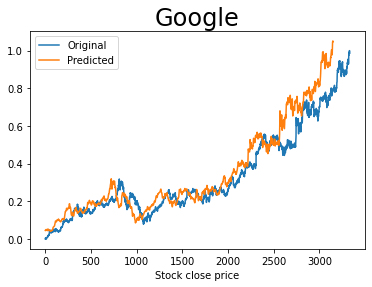

In [17]:
findLSTMResult(df_new_google, "Google")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 90, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
110/110 [==============================] - 11s 96ms/step - loss: 1.9063e-04 - val_loss: 5.0336e-04
Epoch 2/32
110/110 [==============================] - 10s 89ms/step - loss: 1.9575e-05 - val_loss: 6.0035e-04
Epoch 3/32
110/110 [==============================] - 10s 94ms/step - loss: 1.9246e-05 - val_loss: 3.5169e-04
Epoch 4/32
110/110 [==============================

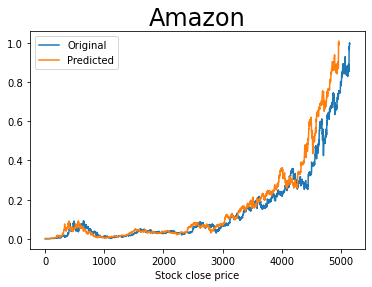

In [18]:
findLSTMResult(df_new_amazon, "Amazon")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 90, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
22/22 [==============================] - 2s 112ms/step - loss: 0.0517 - val_loss: 0.0153
Epoch 2/32
22/22 [==============================] - 2s 86ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 3/32
22/22 [==============================] - 2s 90ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 4/32
22/22 [==============================] - 2s 86ms/step - loss: 0.0048 - 

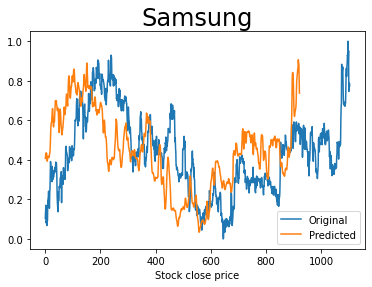

In [19]:
findLSTMResult(df_new_samsung, "Samsung")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 90, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
11/11 [==============================] - 2s 144ms/step - loss: 0.1167 - val_loss: 0.0197
Epoch 2/32
11/11 [==============================] - 1s 88ms/step - loss: 0.0185 - val_loss: 0.0241
Epoch 3/32
11/11 [==============================] - 1s 81ms/step - loss: 0.0108 - val_loss: 0.0038
Epoch 4/32
11/11 [==============================] - 1s 79ms/step - loss: 0.0092 - 

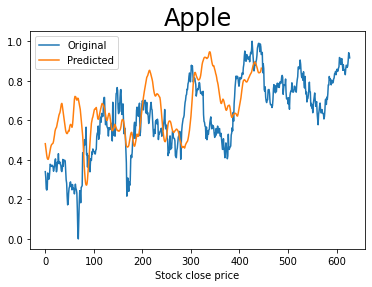

In [20]:
findLSTMResult(df_new_apple, "Apple")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 90, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
172/172 [==============================] - 16s 92ms/step - loss: 0.0014 - val_loss: 6.4740e-04
Epoch 2/32
172/172 [==============================] - 16s 91ms/step - loss: 1.2917e-04 - val_loss: 5.9998e-04
Epoch 3/32
172/172 [==============================] - 16s 94ms/step - loss: 1.1457e-04 - val_loss: 8.3392e-04
Epoch 4/32
172/172 [==============================] - 

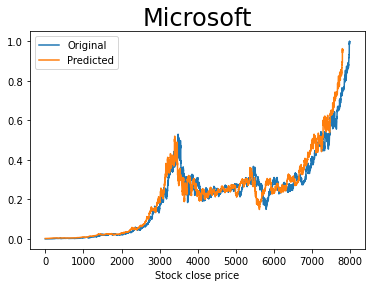

In [21]:
findLSTMResult(df_new_microsoft, "Microsoft")

## CNN

Convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, that is most commonly applied to analyzing visual imagery and have applications in financial time series.

As CNNs are recommended for stock prediction, we thought we would try them out and see whether they should be or not.

Our objective with the CNN was to try to predict whether the stock price went up during the day or not. To understand easier whether the "Close" value was higher than the "Open" value for each entry in the dataframe.

Starting with making a new boolean column whether it went up during the day or not. We split the data into training and validation data and normalized it as before with our LSTM model. As our understanding of the CNN is not in-depth, we sticked with a simple model to test the generalization of predicting such classes on financial data. To get our results, we used sklearn.metric functions to see the accuracy, precision, recall and f1 of the model.

In [22]:
#Method to make our CNN model
def create_CNN_model (shapesize):
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, input_shape=(shapesize, 1)))
  model.add(MaxPooling1D(pool_size=(1)))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

#Method to split our data into training and validation with 0.8 split.
def createCNNTrainTestData(df):
  train_size = int(len(df) * 0.8)
  dataArray = df.to_numpy()
  X_train = dataArray[:train_size, :-1]
  y_train = dataArray[:train_size, -1]
  X_test = dataArray[train_size:, :-1]
  y_test = dataArray[train_size:, -1]
  return (X_train, y_train, X_test, y_test)

#Method to print out our metrics for the model.
def printStatistics(y_test, results):
  accuracy = accuracy_score(y_test, results)
  precision = precision_score(y_test, results)
  recall = recall_score(y_test, results)
  f1 = f1_score(y_test, results)
  print('Accuracy: '+str(accuracy))
  print('Precision: '+str(precision))
  print('Recall: '+str(recall))
  print('F1 Score: '+str(f1))


In [23]:
def findCNNResult(dataframe) :
  df = create_df_copy(dataframe)

  df['Shift'] = df['Open'].shift(periods=-10).dropna()
  df['y'] = np.where(df['Open'] < df['Shift'], 1, 0)
  df = df.drop(labels=['Date', 'OpenInt'], axis=1)

  X_train, y_train, X_test, y_test = createCNNTrainTestData(df)

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  model = create_CNN_model(X_train.shape[1])
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1000, verbose=1)

  results = model.predict_classes(X_test, verbose=0)[:, 0]

  printStatistics(y_test, results)

In [24]:
findCNNResult(df_new_google)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 193       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 0s 52ms/step - loss: 0.7058 - accuracy: 0.4422 - val_loss: inf - val_accuracy: 0.5952
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 0.6985 - accuracy: 0.4651 - val_loss: inf - val

In [25]:
findCNNResult(df_new_apple)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 32)             64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 193       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 0s 134ms/step - loss: 0.6991 - accuracy: 0.5219 - val_loss: 45889.7930 - val_accuracy: 0.5873
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6974 - accuracy: 0.5219 - val_loss: 4

In [26]:
findCNNResult(df_new_amazon)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 32)             64        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 193       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 0s 30ms/step - loss: 0.6960 - accuracy: 0.4345 - val_loss: nan - val_accuracy: 0.3909
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5388 - val_loss: nan - val_

In [27]:
findCNNResult(df_new_samsung)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 32)             64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 193       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 0s 133ms/step - loss: 0.6944 - accuracy: 0.5062 - val_loss: inf - val_accuracy: 0.4615
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6938 - accuracy: 0.5085 - val_loss: inf - va

In [28]:
findCNNResult(df_new_microsoft)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 6, 32)             64        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 193       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
7/7 [==============================] - 0s 24ms/step - loss: 0.6924 - accuracy: 0.5334 - val_loss: nan - val_accuracy: 0.3820
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5454 - val_loss: nan - val_

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pages that helped us in this project : 

https://en.wikipedia.org/

https://scikit-learn.org/

https://stackabuse.com